In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
import os
import pathlib
from imutils import contours

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

def image_smoothening(img):
  BINARY_THREHOLD = 180
  ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
  ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  blur = cv2.GaussianBlur(th2, (1, 1), 0)
  ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  return th3
def _cropImage(x1, y1, x2, y2, img):
  if np.ndim(img) == 3:
    crop = img[y1:y2, x1:x2, :]
  else:
    crop = img[y1:y2, x1:x2]
  return crop



In [293]:
def image(path_image, overlapThresh ):
  large = cv2.imread(path_image)
  i_s=image_smoothening(img_grey)
  cnts , hierarchy = cv2.findContours(i_s, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  area=[cv2.contourArea(cnt) for cnt in cnts]
  area.sort()
  del cnts[area.index(max(area))]
  
  rgb_copy=large.copy()
  ROI_number = 0
  img_cut=[]
  for idx in range(len(cnts)):
    x, y, w, h = cv2.boundingRect(cnts[idx])
    ROI = large[y:y+h, x:x+w]
    if(cv2.contourArea(cnts[idx])/area[-2] > overlapThresh):
      cv2.rectangle(rgb_copy, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)
      img_cut.append(ROI)
      ROI_number+=1
  plt.figure(figsize=(30,10))
  plt.imshow(rgb_copy)
  print(ROI_number)
  return img_cut

69


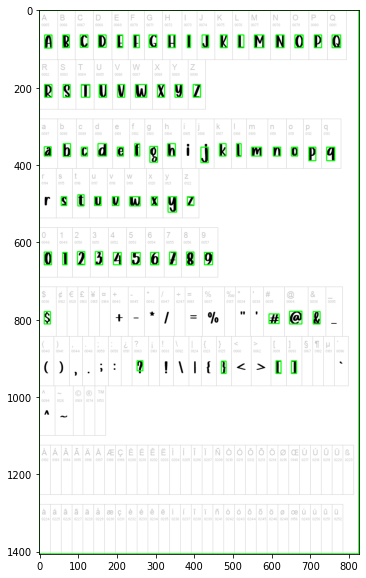

In [301]:
m=image('/content/little_comet1.png', 0.3)